dataset from CHLOE ZHAO!

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
notchloe = True

In [3]:
def not_chloe(b):
    if b is True:
        return "elaineran", "Desktop"
    else: 
        return "chloezhao", "summer 2024 project"

In [4]:
data_path = "/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/piano_notes/"
metadata_path = "/Users/"+not_chloe(notchloe)[0] +"/"+not_chloe(notchloe)[1]+"/summer-project/piano_notes.csv"

In [5]:
import notes_edit
import random

funcs = [notes_edit.time_stretch, notes_edit.add_noise, notes_edit.time_stretch_and_add_noise]
i = 1
while i <11:
    rand = random.randint(0, 2)
    funcs[rand](data_path, metadata_path, i)
    i+=1

/Users/elaineran/Desktop/summer-project/notes_edit.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path + ".wav")
/Users/elaineran/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/elaineran/Desktop/summer-project/notes_edit.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path + ".wav")
/Users/elaineran/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/elaineran/Desktop/summer-project/notes_edit.py:18: UserWarning: PySound

In [6]:
def load_data(data_path, metadata_path):
    features = []
    labels = []


    metadata = pd.read_csv(metadata_path)


    for index, row in metadata.iterrows():
        file_path = os.path.join(data_path, f"{row['File Names']}.wav")


        # Load the audio file and resample it
        target_sr = 22050
        audio, sample_rate = librosa.load(file_path, sr=target_sr)

        # Check if the audio length is less than the default n_fft size
        if len(audio) < 2048:
            # Pad the audio file with zeros
            audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')



        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)


        # Append features and labels
        features.append(mfccs_scaled)
        labels.append(row['Unique Notes'])


    return np.array(features), np.array(labels)



In [7]:
features, labels = load_data(data_path, metadata_path)


# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)


/Users/elaineran/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  from ipykernel import kernelapp as app
/Users/elaineran/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/elaineran/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  from ipykernel import kernelapp as app
/Users/elaineran/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/U

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_onehot, test_size=0.2, random_state=42)


In [9]:
input_shape = (X_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 774 samples, validate on 194 samples
Epoch 1/100
774/774 [==============================] - 2s 3ms/step - loss: 10.3563 - accuracy: 0.0840 - val_loss: 2.4753 - val_accuracy: 0.1495
Epoch 2/100
774/774 [==============================] - 1s 1ms/step - loss: 3.3622 - accuracy: 0.1202 - val_loss: 2.4037 - val_accuracy: 0.1134
Epoch 3/100
774/774 [==============================] - 1s 1ms/step - loss: 2.5385 - accuracy: 0.1447 - val_loss: 2.3124 - val_accuracy: 0.3144
Epoch 4/100
774/774 [==============================] - 1s 1ms/step - loss: 2.4195 - accuracy: 0.1705 - val_loss: 2.1720 - val_accuracy: 0.4227
Epoch 5/100
774/774 [==============================] - 1s 1ms/step - loss: 2.2227 - accuracy: 0.2545 - val_loss: 1.8571 - val_accuracy: 0.4639
Epoch 6/100
774/774 [==============================] - 1s 1ms/step - loss: 1.9644 - accuracy: 0.3450 - val_loss: 1.5879 - val_accuracy: 0.5412
Epoch 7/100
774/774 [==============================] - 1s 1ms/step - loss: 1.7038 - accuracy: 0

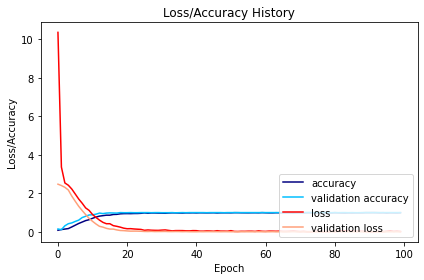

In [13]:
# plotting from history

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")


plots = plot1_loss + plot1_val_loss
labs = [plot.get_label() for plot in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History")
plt.tight_layout()
axis1.legend(loc='lower right')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Loss-Accuracy-Notes")
plt.show()

In [14]:
test_predictions = model.predict(X_test)

In [15]:
predicted_class_indices = np.argmax(test_predictions, axis=1)
predicted_classes = le.inverse_transform(predicted_class_indices)
print(predicted_classes)

['G#' 'G#' 'A' 'E' 'G' 'A' 'E' 'F#' 'A' 'F' 'C#' 'B' 'Bb' 'D' 'B' 'F' 'Eb'
 'E' 'Eb' 'A' 'C' 'G' 'B' 'E' 'Bb' 'G#' 'A' 'Eb' 'F#' 'D' 'Eb' 'F' 'C' 'E'
 'F' 'G' 'D' 'Bb' 'Eb' 'C#' 'B' 'A' 'C' 'Bb' 'G#' 'A' 'F#' 'Bb' 'G' 'A'
 'F' 'G' 'E' 'Eb' 'Eb' 'G#' 'B' 'A' 'Bb' 'C#' 'B' 'F#' 'A' 'Eb' 'G' 'Bb'
 'F#' 'E' 'C' 'Eb' 'F#' 'D' 'A' 'A' 'D' 'C' 'E' 'E' 'C' 'C' 'D' 'C#' 'G#'
 'F' 'A' 'G' 'C#' 'B' 'Bb' 'F#' 'G#' 'A' 'Eb' 'C' 'Eb' 'C#' 'B' 'F#' 'B'
 'G#' 'A' 'F#' 'F' 'G#' 'G#' 'Eb' 'G#' 'A' 'Bb' 'Eb' 'C' 'F' 'F' 'E' 'A'
 'D' 'C' 'G' 'B' 'G#' 'Bb' 'Eb' 'E' 'C' 'F' 'A' 'Eb' 'C#' 'B' 'C#' 'Eb'
 'D' 'B' 'F' 'Bb' 'F' 'E' 'G' 'G' 'A' 'G' 'A' 'G' 'C' 'C#' 'A' 'C' 'C#'
 'D' 'G' 'Bb' 'C#' 'B' 'G' 'E' 'G#' 'F' 'D' 'D' 'Bb' 'F#' 'Eb' 'Eb' 'F#'
 'C#' 'Eb' 'Eb' 'D' 'B' 'Bb' 'D' 'D' 'Eb' 'F' 'Eb' 'C' 'C' 'G#' 'C' 'F'
 'D' 'Bb' 'C' 'Bb' 'Bb' 'G#' 'F#' 'F#' 'Eb' 'G' 'C' 'F#' 'F#' 'E']


In [16]:
y_true = np.argmax(y_test, axis=1)
true_classes = le.inverse_transform(y_true)
print(true_classes)

['G#' 'G#' 'A' 'E' 'G' 'A' 'E' 'F#' 'A' 'F' 'C#' 'B' 'Bb' 'D' 'B' 'F' 'Eb'
 'E' 'Eb' 'A' 'C' 'G' 'B' 'E' 'Bb' 'G#' 'A' 'Eb' 'F#' 'D' 'Eb' 'F' 'C' 'E'
 'F' 'G' 'D' 'Bb' 'Eb' 'C#' 'B' 'A' 'C' 'Bb' 'G#' 'A' 'F#' 'Bb' 'G' 'A'
 'F' 'G' 'E' 'Eb' 'Eb' 'G#' 'B' 'A' 'Bb' 'C#' 'B' 'F#' 'A' 'Eb' 'G' 'Bb'
 'F#' 'E' 'C' 'Eb' 'F#' 'D' 'A' 'A' 'D' 'C' 'E' 'E' 'C' 'C' 'D' 'C#' 'G#'
 'F' 'A' 'G' 'C#' 'B' 'Bb' 'F#' 'G#' 'A' 'Eb' 'C' 'Eb' 'C#' 'B' 'F#' 'B'
 'G#' 'A' 'F#' 'F' 'G#' 'G#' 'Eb' 'G#' 'A' 'Bb' 'Eb' 'C' 'F' 'F' 'E' 'A'
 'D' 'C' 'G' 'B' 'G#' 'Bb' 'Eb' 'E' 'C' 'F' 'A' 'Eb' 'C#' 'B' 'C#' 'Eb'
 'D' 'B' 'F' 'Bb' 'F' 'E' 'G' 'G' 'A' 'G' 'A' 'G' 'C' 'C#' 'A' 'C' 'C#'
 'D' 'G' 'Bb' 'C#' 'B' 'G' 'E' 'G#' 'F' 'D' 'D' 'Bb' 'F#' 'Eb' 'Eb' 'F#'
 'C#' 'Eb' 'Eb' 'D' 'B' 'Bb' 'D' 'D' 'Eb' 'F' 'Eb' 'C' 'C' 'G#' 'C' 'F'
 'D' 'Bb' 'C' 'Bb' 'Bb' 'G#' 'F#' 'F#' 'Eb' 'G' 'C' 'F#' 'F#' 'E']


In [17]:
unique_labels = np.unique(np.concatenate([y_true, predicted_class_indices]))


# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_class_indices)
print("Accuracy:", accuracy)


# Generate a classification report
print(classification_report(y_true, predicted_class_indices, labels=unique_labels, target_names=le.inverse_transform(unique_labels)))


# Confusion matrix
cm = confusion_matrix(y_true, predicted_class_indices)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        21
           B       1.00      1.00      1.00        14
          Bb       1.00      1.00      1.00        17
           C       1.00      1.00      1.00        18
          C#       1.00      1.00      1.00        12
           D       1.00      1.00      1.00        15
           E       1.00      1.00      1.00        14
          Eb       1.00      1.00      1.00        23
           F       1.00      1.00      1.00        15
          F#       1.00      1.00      1.00        15
           G       1.00      1.00      1.00        15
          G#       1.00      1.00      1.00        15

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

Confusion Matrix:
 [[21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0

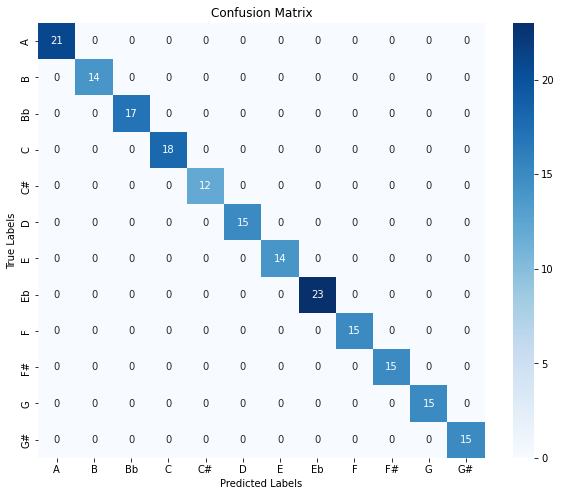

In [18]:


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Confusion-Matrix-Notes")
plt.show()


In [19]:
import soundfile as sf
from pydub import AudioSegment
import librosa.display

In [45]:
# Load an audio file
audio_path = '/Users/elaineran/Desktop/summer-project/testing_soundfiles/falalala2.wav'
y, sr = librosa.load(audio_path)

# Onset detection
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

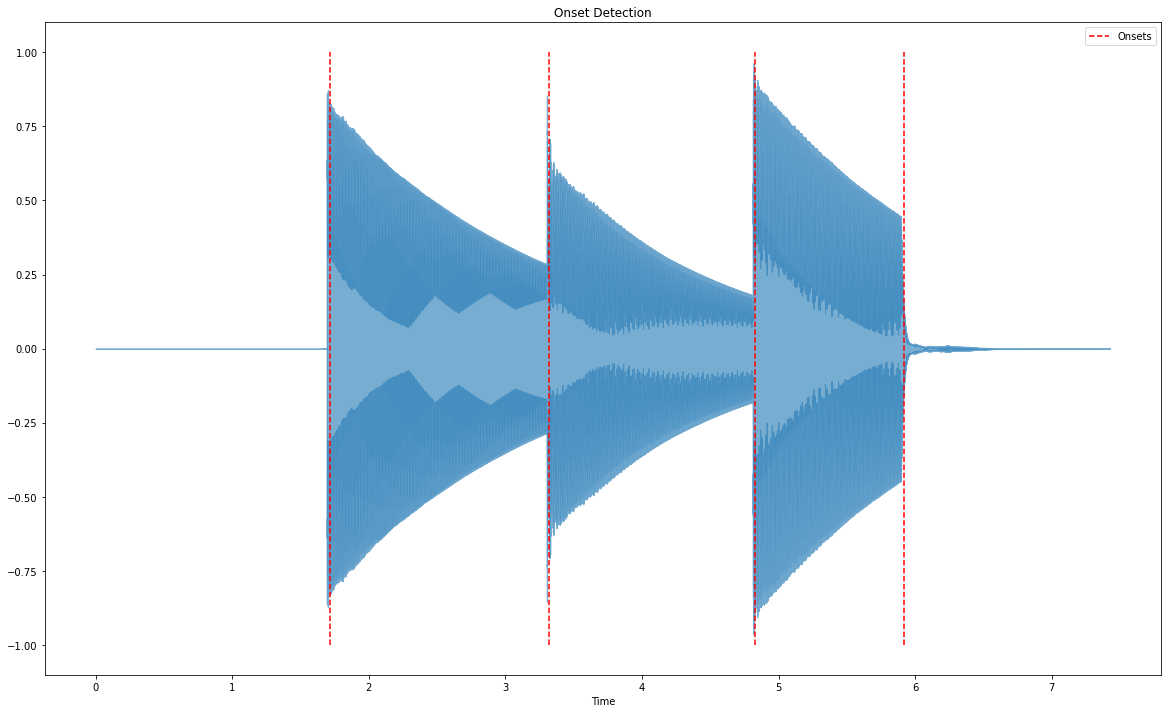

Detected onset times: [1.71827664 3.32045351 4.82975057 5.92108844]


In [46]:
# Plotting the waveform and onsets
plt.figure(figsize=(20, 12))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.title('Onset Detection')
plt.legend()
plt.show()

# Print the detected onset times
print('Detected onset times:', onset_times)


In [47]:
onset_times = np.append(onset_times, librosa.get_duration(y=y, sr=sr))

# Split and save the audio segments
for i in range(len(onset_times) - 1):
    start_sample = int(onset_times[i] * sr)
    end_sample = int(onset_times[i + 1] * sr)
    segment = y[start_sample:end_sample]
    segment_filename = f'segment_{i + 1}.wav'
    sf.write("/Users/elaineran/Desktop/summer-project/testing_soundfiles/" + segment_filename, segment, sr)
    print(f'Saved {segment_filename} from {onset_times[i]:.2f}s to {onset_times[i + 1]:.2f}s')

Saved segment_1.wav from 1.72s to 3.32s
Saved segment_2.wav from 3.32s to 4.83s
Saved segment_3.wav from 4.83s to 5.92s
Saved segment_4.wav from 5.92s to 7.43s


In [50]:
test_audio_path = "/Users/elaineran/Desktop/summer-project/testing_soundfiles/segment_3.wav"
audio, _ = librosa.load(test_audio_path, sr=22050)
# Pad the audio file if necessary
if len(audio) < 2048:
    audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=40)
mfccs_scaled = np.mean(mfccs.T, axis=0)
mfccs_scaled = mfccs_scaled.reshape(1, mfccs_scaled.shape[0], 1)

# Predict the chord
predicted_probabilities = model.predict(mfccs_scaled)
predicted_label = np.argmax(predicted_probabilities, axis=1)
predicted_note = le.inverse_transform(predicted_label)

print(f"The predicted note is: {predicted_note[0]}")

The predicted note is: D
